In [2]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [3]:
marsweather_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
marsweather_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
marsweather_df2 = marsweather_df[0]
marsweather_df2

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
marsweather_df2.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
marsweather_df2['terrestrial_date'] = pd.to_datetime(marsweather_df2['terrestrial_date'])
marsweather_df2.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [7]:
marsweather_df2.head()
marsweather_df2.to_csv('../DATA/Mars_Weather.csv')

In [8]:
marsweather_monthlyavg = marsweather_df2.groupby(by = 'month').mean().round(1)
marsweather_monthlyavg

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.9,1077.6,15.3,-77.2,862.5
2,1109.9,1175.9,44.3,-79.9,889.5
3,1132.7,1204.4,75.0,-83.3,877.3
4,1175.2,1244.5,104.4,-82.7,806.3
5,1115.0,1182.7,132.9,-79.3,748.6
6,735.3,750.8,164.9,-75.3,745.1
7,714.5,715.1,194.9,-72.3,795.1
8,718.1,795.3,224.3,-68.4,873.8
9,785.8,861.2,254.1,-69.2,913.3


In [9]:
marsmonthlytemp = marsweather_monthlyavg.loc[:,['min_temp']]
marsmonthlytemp

,min_temp
month,
1,-77.2
2,-79.9
3,-83.3
4,-82.7
5,-79.3
6,-75.3
7,-72.3
8,-68.4
9,-69.2


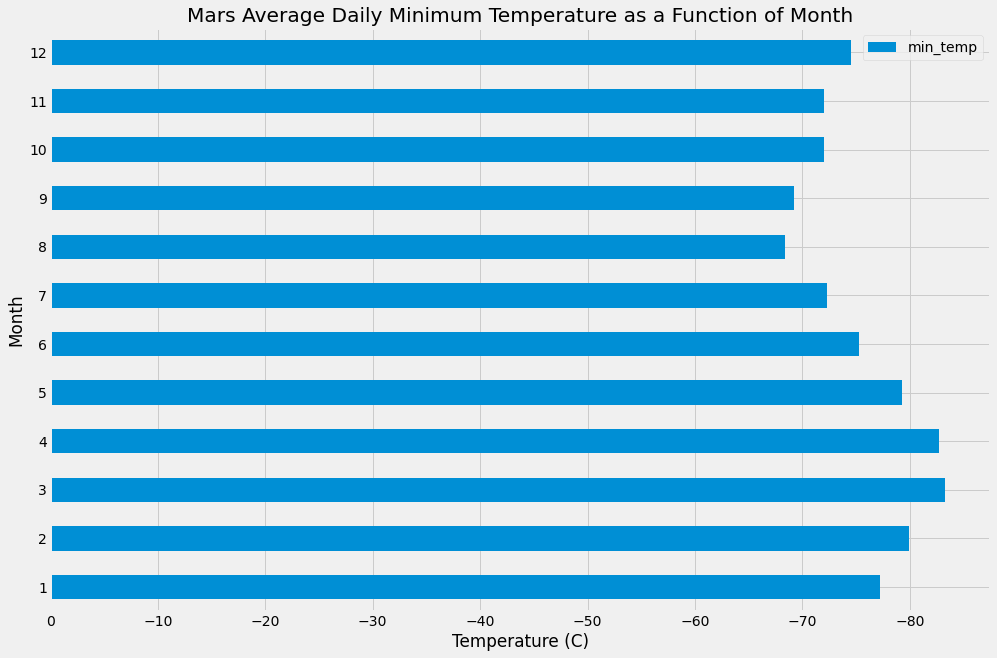

In [10]:
from matplotlib import style
style.use('fivethirtyeight')

ax = marsmonthlytemp.plot.barh(figsize=(15, 10))
ax.invert_xaxis()
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Month')
ax.set_title('Mars Average Daily Minimum Temperature as a Function of Month')

plt.savefig("../IMAGES/Fig3.png")

In [11]:
marsmonthlypress = marsweather_monthlyavg.loc[:,['pressure']]
marsmonthlypress

,pressure
month,
1,862.5
2,889.5
3,877.3
4,806.3
5,748.6
6,745.1
7,795.1
8,873.8
9,913.3


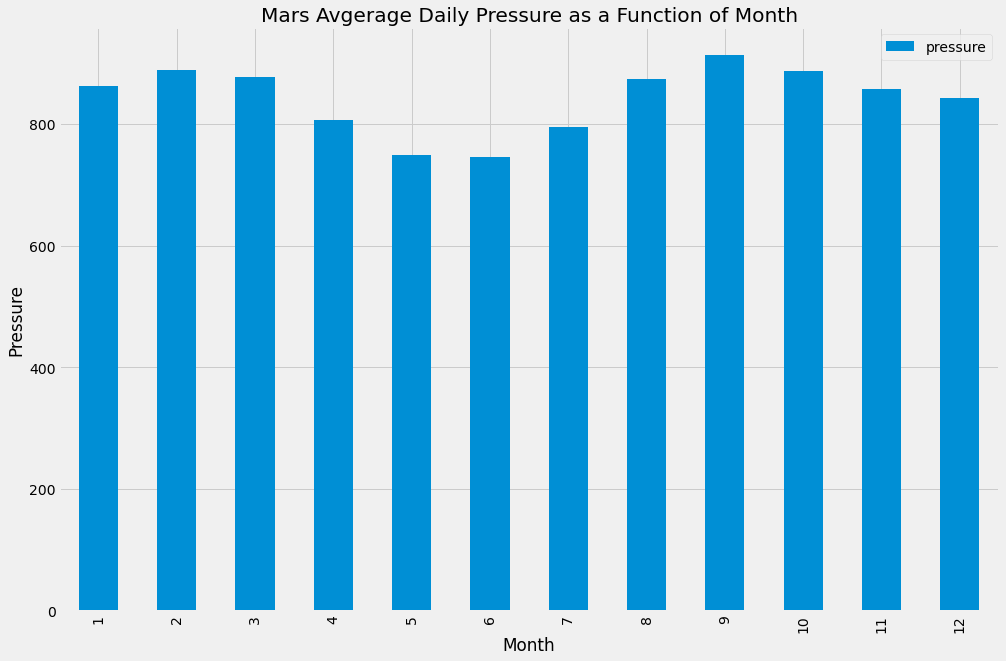

In [12]:
from matplotlib import style
style.use('fivethirtyeight')

ax = marsmonthlypress.plot.bar(figsize=(15, 10))

ax.set_xlabel('Month')
ax.set_ylabel('Pressure')
ax.set_title('Mars Avgerage Daily Pressure as a Function of Month')

plt.savefig("../IMAGES/Fig4.png")

In [13]:
marsyearest = marsweather_df2.loc[:,['terrestrial_date','min_temp']]
marsyearest.set_index('terrestrial_date', inplace = True)
marsyearest

,min_temp
terrestrial_date,
2012-08-16,-75.0
2012-08-17,-76.0
2012-08-18,-76.0
2012-08-19,-74.0
2012-08-20,-74.0
...,...
2018-02-23,-78.0
2018-02-24,-77.0
2018-02-25,-76.0


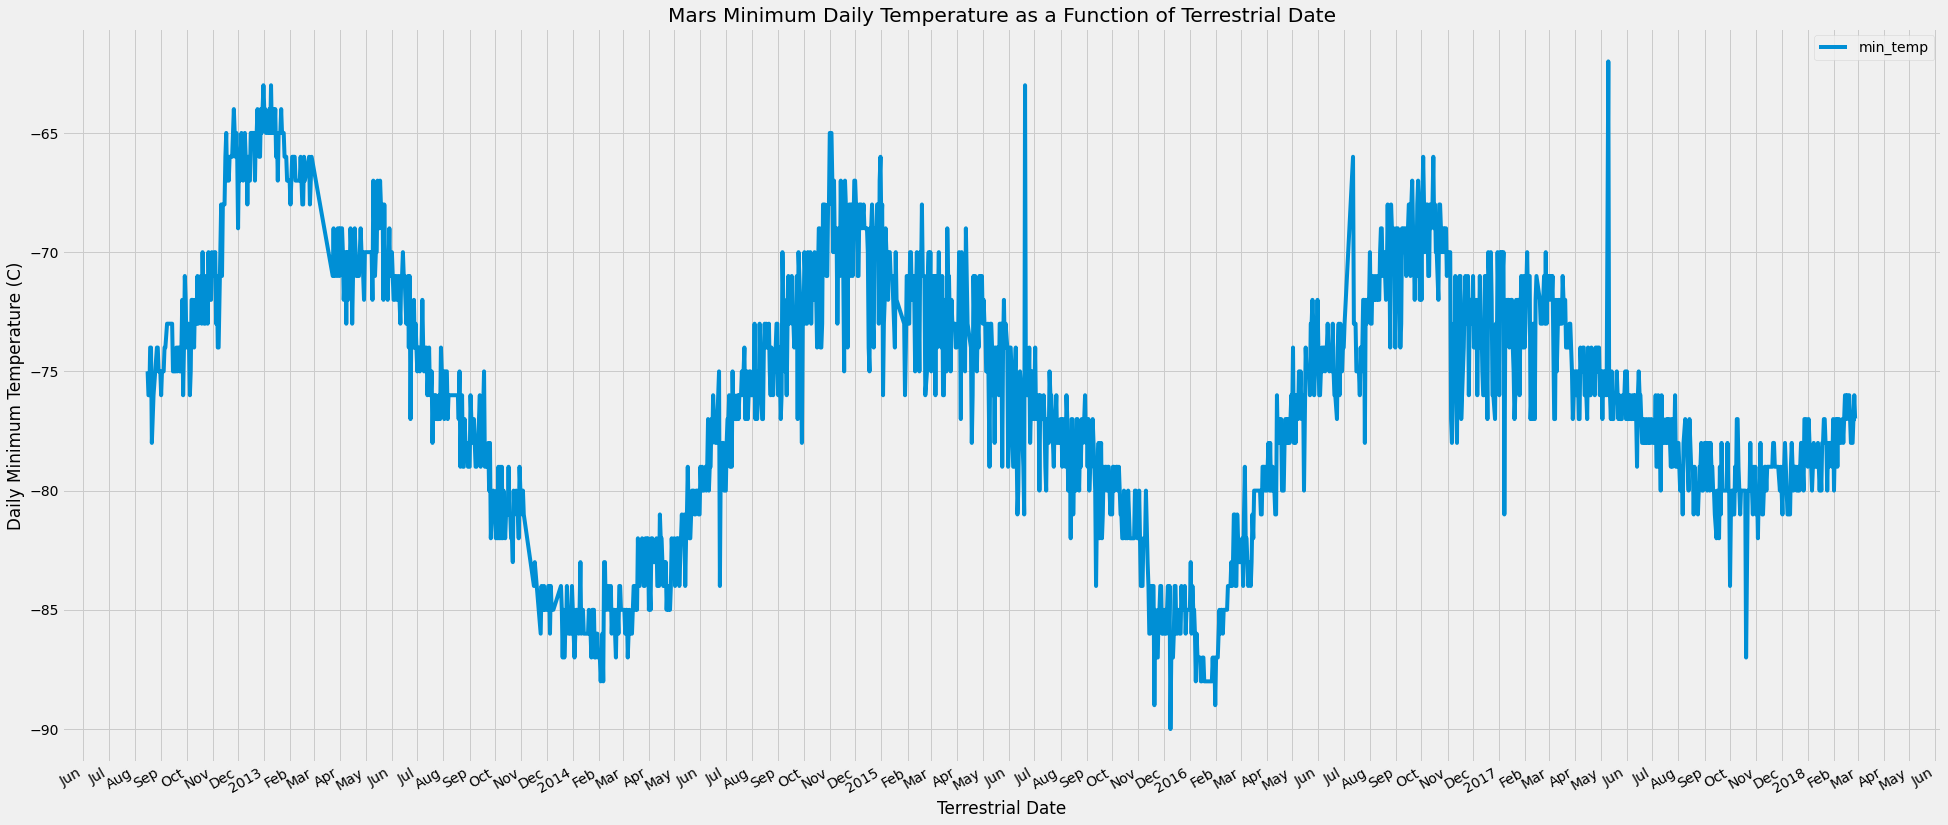

In [14]:
import matplotlib.dates as mdates

from matplotlib import style
style.use('fivethirtyeight')

ax = marsyearest.plot.line(figsize=(30, 15))

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,2,3,4,5,6,7,8,9,10,11,12)))

ax.set_xlabel('Terrestrial Date')
ax.set_ylabel('Daily Minimum Temperature (C)')
ax.set_title('Mars Minimum Daily Temperature as a Function of Terrestrial Date')

plt.savefig("../IMAGES/Fig5.png")